### Data preparation

In [388]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme
import matplotlib.pyplot as plt
#%matplotlib inline
#import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import os
import warnings
import itertools
from sklearn.neural_network import MLPClassifier
import timeit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [3]:
path='/Users/carolinehu/Documents/Documents - caroline’s MacBook Pro/Learning/Gatech/Course/CS7641/Assignments/Assignment3/fetal_health.csv'
df=pd.read_csv(path)

In [4]:
df.head(10)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   
5           134.0          0.001             0.0                 0.010   
6           134.0          0.001             0.0                 0.013   
7           122.0          0.000             0.0                 0.000   
8           122.0          0.000             0.0                 0.002   
9           122.0          0.000             0.0                 0.003   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                     0.000   
1                0.003                   0.0                     0.000   
2                0.003                   0.0                     0.000   
3                0.003                   0.0                     0.000   
4                0.000                   0.0                     0.000   
5                0.009                   0.0                     0.002   
6                0.008                   0.0                     0.003   
7                0.000                   0.0                     0.000   
8                0.000                   0.0                     0.000   
9                0.000                   0.0                     0.000   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   
5                             26.0                                   5.9   
6                             29.0                                   6.3   
7                             83.0                                   0.5   
8                             84.0                                   0.5   
9                             86.0                                   0.3   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   
5                                                0.0       ...           50.0   
6                                                0.0       ...           50.0   
7                                                6.0       ...           62.0   
8                                                5.0       ...           62.0   
9                                                6.0       ...           62.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   
5          200.0                        5.0                         3.0   
6          200.0                        6.0                         3.0   
7          130.0                        0.0 

In [5]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [375]:
features=df.columns[:21]

###  EDA

In [9]:
df.dropna(inplace=True)

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
print('x_train size is:',x_train.shape)
print('y_train size is:',y_train.shape)
print('x_test size is:',x_test.shape)
print('y_test size is:',y_test.shape)

x_train size is: (1700, 21)
y_train size is: (1700,)
x_test size is: (426, 21)
y_test size is: (426,)


### Kmeans Clustering

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score,v_measure_score,adjusted_rand_score,adjusted_mutual_info_score

In [38]:
def elbow_km(X,max_k):
    inertia=[]
    for k in range(1,max_k+1):
        kmeans=KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1).fit(X)
        inertia.append(np.sqrt(kmeans.inertia_))
    return inertia

In [424]:
inertia=elbow_km(x_train,10)
def plot_elbow(inertia,max_k):
    plt.plot(range(1,max_k+1),inertia,marker='s')
    plt.xlabel('K')
    plt.ylabel('J (C_K)')
    plt.show()

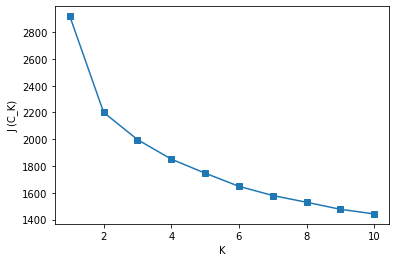

In [425]:
plot_elbow(inertia,max_k=10)

In [430]:
def silho_km(X,max_k):
    sil=[]
    for k in range(2,max_k+1):
        kmeans=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1).fit(X)
        labels=kmeans.labels_
        sil.append(silhouette_score(X, labels, metric='euclidean'))
    return sil

In [431]:
sil=silho_km(x_train,10)
def plot_silho(sil,max_k):
    plt.plot(range(2,max_k+1),sil,marker='s')
    plt.xlabel('K')
    plt.ylabel('silhouette_score')
    plt.show()

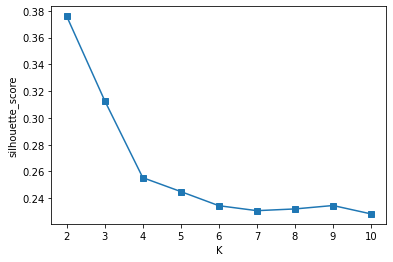

In [56]:
plot_silho(sil,max_k=10)

In [42]:
def homogen_km(X,max_k,y):
    hom=[]
    for k in range(2,max_k+1):
        km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1)
        kmeans=km.fit(X)
        y_pred=kmeans.predict(X)
        hom.append(homogeneity_score(labels_pred=y_pred,labels_true=y))
    return hom
        

In [53]:
hom=homogen_km(X=x_train,max_k=10,y=y_train)
def plot_homogen(hom,max_k):
    plt.plot(range(2,max_k+1),hom,marker='s')
    plt.xlabel('K')
    plt.ylabel('homogeneity_score')
    plt.show()

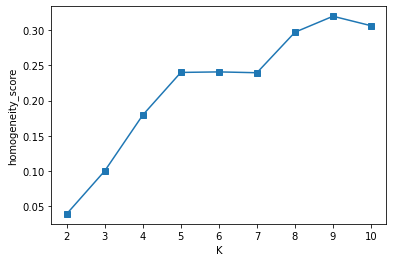

In [54]:
plot_homogen(hom,max_k=10)

In [71]:
def completeness_km(X,max_k,y):
    compl=[]
    for k in range(2,max_k+1):
        km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1)
        kmeans=km.fit(X)
        #y_pred=kmeans.predict(X)
        compl.append(completeness_score(labels_pred=kmeans.labels_,labels_true=y))
    return compl        

In [72]:
compl=completeness_km(x_train,max_k=10,y=y_train)
def plot_compl(compl,max_k):
    plt.plot(range(2,max_k+1),compl,marker='s')
    plt.xlabel('K')
    plt.ylabel('completeness_score')
    plt.show()

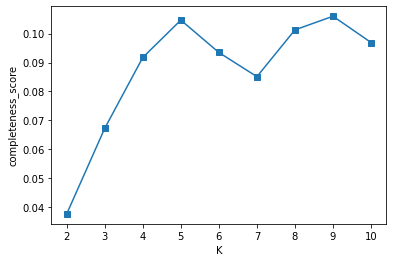

In [74]:
plot_compl(compl=compl,max_k=10)

In [98]:
def kmeans_accuracy(X,n_clusters,y):
    correct=0
    #for i in range(len(X)):
        #pred=X.reshape(-1,len(X))
        km=KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1).fit(X)
        prediction=km.predict(X)
        if prediction[0]==y[i]:
            correct+=1
    return(correct/len(X))

In [432]:
km=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1).fit(x_train)
prediction=km.predict(x_train)
prediction

array([0, 1, 0, ..., 3, 3, 3], dtype=int32)

In [311]:
def plot_clusters(X_clustered,X_data,dataset_name,estimator_name):
    plt.figure(figsize=(7,7))
    LABEL_COLOR_MAP={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'b',8:'g',9:'r',10:'c',11:'m',12:'y',13:'k',14:'b',15:'g'}
    label_color=[LABEL_COLOR_MAP[l] for l in X_clustered]
    plt.title('Scatter Plot of Clusters for %s using %s' %(dataset_name,estimator_name))
    plt.scatter(X_data[:,1],X_data[:,2],c=label_color,alpha=0.5)
    return plt

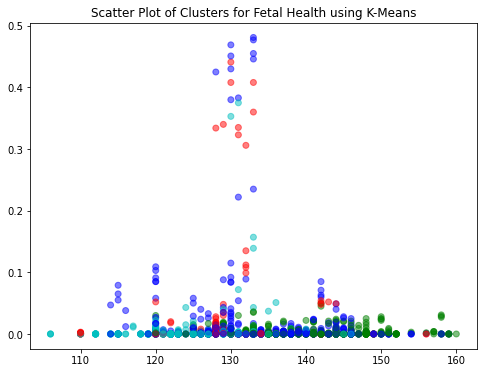

In [433]:
plt.figure(figsize=(8,6))
LABEL_COLOR_MAP={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'b',8:'g',9:'r',10:'c',11:'m',12:'y',13:'k',14:'b',15:'g'}
label_color=[LABEL_COLOR_MAP[l] for l in prediction]
plt.title('Scatter Plot of Clusters for %s using %s' %('Fetal Health','K-Means'))
plt.scatter(x_train.values[:,0],x_train.values[:,2],c=label_color,alpha=0.5)
plt.show()

In [146]:
def evaluate_km(n_clusters,X,y,dataset_name,algo_name):
    km=KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=1).fit(X)
    labels=km.labels_
    df=pd.DataFrame({'clust_label':labels,'orig_label':y_train})
    ct=pd.crosstab(df['clust_label'],df['orig_label'])
    y_pred=km.predict(X)
    print('Stats for K-Means analysis on %s using %s algorithm' %(dataset_name,algo_name))
    print('%9s'%'inertia homo compl v-meas ARI AMI silhouette')
    print('%i %.3f %.3f %.3f %.3f %.3f %.3f'
         % (kmeans.inertia_,
           homogeneity_score(y,y_pred),
           completeness_score(y,y_pred),
           v_measure_score(y,y_pred),
           adjusted_rand_score(y,y_pred),
           adjusted_mutual_info_score(y,y_pred),
           silhouette_score(X,y_pred,metric='euclidean')))
    return ct


In [147]:
evaluate_km(n_clusters=3,X=x_train,y=y_train,dataset_name='Fetal Health',algo_name='K-Means')

Stats for K-Means analysis on Fetal Health using K-Means algorithm
inertia homo compl v-meas ARI AMI silhouette
2716640 0.100 0.067 0.080 0.055 0.079 0.313


orig_label   1.0  2.0  3.0
clust_label               
0            143   17   76
1            571  168   48
2            615   42   20

### EM

In [133]:
from sklearn.mixture import GaussianMixture

In [134]:
def EM_analysis(X,clusters):
    lowest_bic=np.infty
    bic=[]
    n_components=range(1,clusters+1)
    cv_types=['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_component in n_components:
            gmm=GaussianMixture(n_components=n_component, covariance_type=cv_type).fit(X)
            bic.append(gmm.bic(X))
            if bic[-1]<lowest_bic:
                lowest_bic=bic[-1]
                best_gmm=gmm
    return np.array(bic),best_gmm
    

In [135]:
def plot_bic(bic,clusters,dataset):
    cv_types=['spherical','tied','diag','full']
    n_components=range(1,clusters+1)
    color_iter=itertools.cycle(['magenta','blue','red','darkorange'])
    bars=[]
    
    plt.figure(figsize=(8,6))
    for i, (cv_type,color) in enumerate(zip(cv_types,color_iter)):
        xpos=np.array(n_components)+0.2*(i-2)
        bars.append(plt.bar(xpos,bic[i*len(n_components):(i+1)*len(n_components)],width=0.2,color=color))
    
    plt.xticks(n_components)
    plt.ylim([bic.min()*1.01-0.01*bic.max(),bic.max()])
    plt.title('BIC score per covariance model')
    xpos=np.mod(bic.argmin(),len(n_components))+0.65+0.2*np.floor(bic.argmin()/len(n_components))
    plt.text(xpos,bic.min()*0.97+0.03*bic.max(),'*',fontsize=20)
    plt.xlabel('Number of components')
    plt.ylabel('BIC score')
    plt.legend([b[0] for b in bars],cv_types)
    return plt       

In [139]:
clusters=20
bic_fetal,best_gmm_fetal=EM_analysis(x_train,clusters)
best_gmm_fetal

GaussianMixture(n_components=7)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

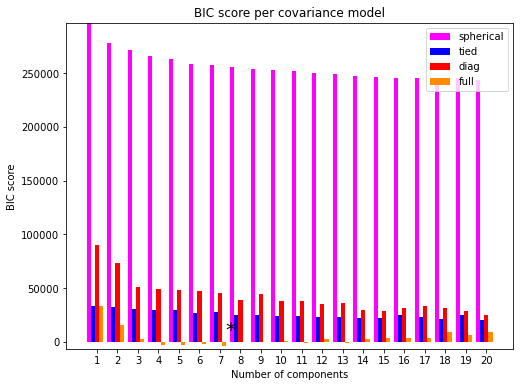

In [141]:
import itertools
plot_bic(bic_fetal,clusters,dataset=x_train)

In [435]:
em=GaussianMixture(n_components=7, covariance_type='full').fit(x_train)
prediction=em.predict(x_train)

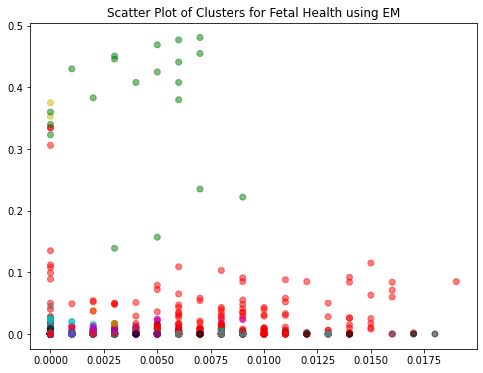

In [436]:
plt.figure(figsize=(8,6))
LABEL_COLOR_MAP={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'b',8:'g',9:'r',10:'c',11:'m',12:'y',13:'k',14:'b',15:'g'}
label_color=[LABEL_COLOR_MAP[l] for l in prediction]
plt.title('Scatter Plot of Clusters for %s using %s' %('Fetal Health','EM'))
plt.scatter(x_train.values[:,1],x_train.values[:,2],c=label_color,alpha=0.5)
plt.show()

In [198]:
def evaluate_em(n_clusters,covariance,X,y,dataset_name,algo_name):
    gmm=GaussianMixture(n_components=n_clusters,covariance_type=covariance,random_state=1).fit(X)
    bic=gmm.bic(X)
    y_pred=gmm.predict(X)
    df=pd.DataFrame({'clust_label':y_pred,'orig_label':y_train})
    ct=pd.crosstab(df['clust_label'],df['orig_label'])
    print('Stats for EM analysis on %s using %s algorithm' %(dataset_name,algo_name))
    print('%9s'%'inertia homo compl v-meas ARI AMI silhouette')
    print('%i %.3f %.3f %.3f %.3f %.3f %.3f'
         % (kmeans.inertia_,
           homogeneity_score(y,y_pred),
           completeness_score(y,y_pred),
           v_measure_score(y,y_pred),
           adjusted_rand_score(y,y_pred),
           adjusted_mutual_info_score(y,y_pred),
           silhouette_score(X,y_pred,metric='euclidean')))
    return ct

In [199]:
evaluate_em(n_clusters=3,covariance='full',X=x_train,y=y_train,dataset_name='Fetal Health',algo_name='EM')

Stats for EM analysis on Fetal Health using EM algorithm
inertia homo compl v-meas ARI AMI silhouette
2717322 0.108 0.073 0.087 0.071 0.086 0.135


orig_label   1.0  2.0  3.0
clust_label               
0            178   70    6
1            426  144   46
2            725   13   92

### K-Means with PCA

In [159]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly.offline import iplot

In [393]:
def pca_transform(n_comp, X_train):
    pca = PCA(n_components=n_comp, random_state=17)
    reduced_pca = pca.fit_transform(X_train)
    print('Shape of the PCA Data df: ' + str(reduced_pca.shape))
    return reduced_pca, pca

In [163]:
pca=PCA().fit(x_train)

In [164]:
pcaratio=pca.explained_variance_ratio_
trace=go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data=[trace]
layout=dict(title='Fetal Health Dataset - PCA Explained Variance')
fig=dict(data=data,layout=layout)
iplot(fig)

***n_components=5 obtain 0.98 variance***

In [216]:
# get 90% of the variance

pca=PCA(n_components=5)
reduced_PCA=pca.fit_transform(x_train)


Text(0, 0.5, 'J (C_K)')

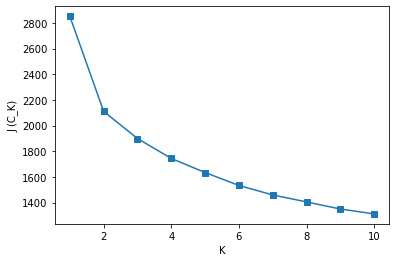

In [217]:
inertia_pca=elbow(reduced_PCA,10)
plt.plot(range(1,11),inertia_pca,marker='s')
plt.xlabel('K')
plt.ylabel('J (C_K)')

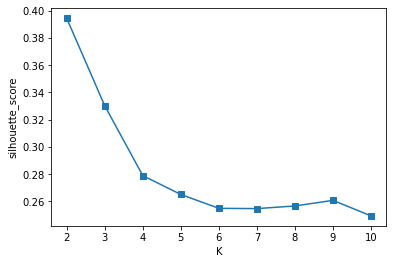

In [218]:
sil=silho_km(reduced_PCA,10)
plot_silho(sil,max_k=10)


In [439]:
kmeans=KMeans(n_clusters=4)
PCA_km_pred=kmeans.fit_predict(reduced_PCA)


In [440]:
df_pca_km_pred=pd.DataFrame(PCA_km_pred)
df_pca_km_pred['cluster']=PCA_km_pred



In [441]:
# visualize clustering using PCA 2D

pca2=PCA(n_components=2)
reduced_PCA2=pca2.fit_transform(x_train)
reduced_PCA2=pd.DataFrame(reduced_PCA2)
reduced_PCA2['cluster']=PCA_km_pred
reduced_PCA2.columns=['x1','x2','cluster']


In [442]:
# visualize clustering using TSNE
# TSNE is created from 6D PCA components

X=reduced_PCA[:,:-1]
Xtsne=TSNE(n_components=2).fit_transform(X)
dftsne=pd.DataFrame(Xtsne)
dftsne['cluster']=PCA_km_pred
dftsne.columns=['x1','x2','cluster']


In [446]:
def plot2D_PCA(X,pred_cluster):
    pca=PCA(n_components=2)
    reduced_pca=pca.fit_transform(X)
    reduced_pca=pd.DataFrame(reduced_pca)
    reduced_pca['cluster']=pred_cluster
    reduced_pca.columns=['x1','x2','cluster']
    sns.scatterplot(data=reduced_pca,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange'],legend='full',alpha=0.5)
    
    

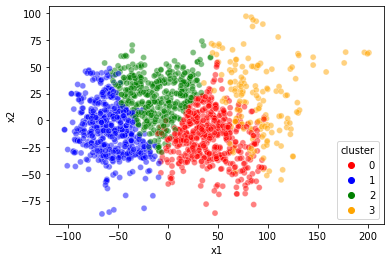

In [447]:
plot2D_PCA(X=x_train,pred_cluster=PCA_km_pred)

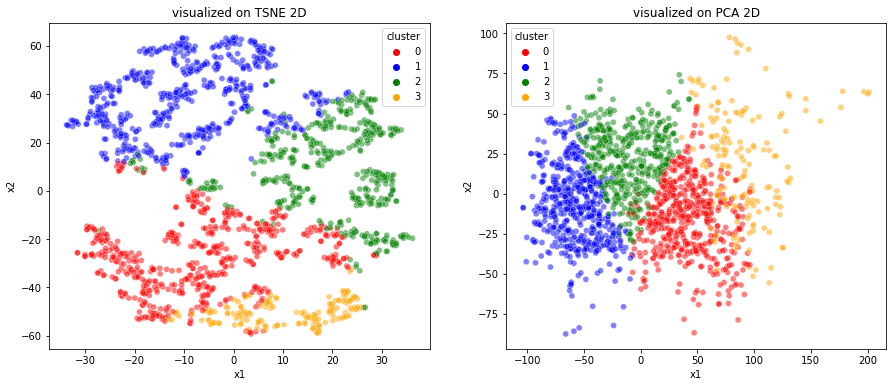

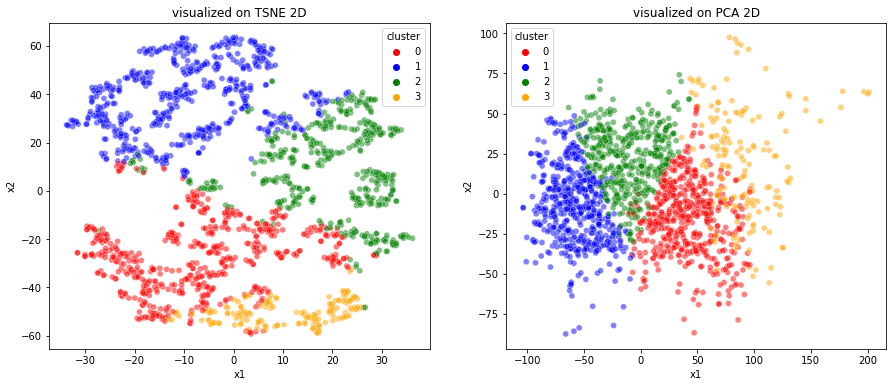

In [448]:
# compare clustering created by PCA and TSNE

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange'],legend='full',alpha=0.5,ax=ax[0])
ax[0].set_title('visualized on TSNE 2D')
sns.scatterplot(data=reduced_PCA2,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange'],legend='full',alpha=0.5,ax=ax[1])
ax[1].set_title('visualized on PCA 2D')
display(fig)


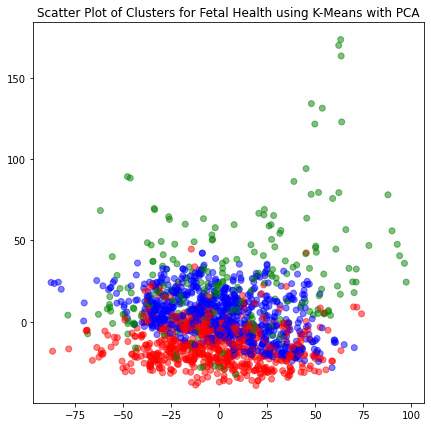

In [318]:
fifa_pca_km_plot=plot_clusters(X_clustered=PCA_km_pred,X_data=reduced_PCA,dataset_name='Fetal Health',estimator_name='K-Means with PCA')

In [224]:
evaluate_km(n_clusters=3,X=reduced_PCA,y=y_train,dataset_name='Fetal Health',algo_name='K-Means')

Stats for K-Means analysis on Fetal Health using K-Means algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.100 0.067 0.080 0.055 0.079 0.330


orig_label   1.0  2.0  3.0
clust_label               
0            617   43   19
1            568  167   49
2            144   17   76

### EM with PCA

In [225]:
def plot_predictions(y_pred,k,dataset_name,estimator):
    plt.figure()
    unique,counts=np.unique(y_pred,return_counts=True)
    res_classes=dict(zip(unique,counts))
    plt.bar(*zip(*res_classes.items()))
    plt.ylabel('Number of Samples')
    plt.xlabel('Cluster ID')
    plt.xticks(range(0,k))
    plt.title('Distribution of Cluster Predictions for %s on %s' %(estimator,dataset_name))
    return plt  

In [226]:
clusters=20
bic_pca_em_fh,best_pca_em_fh=EM_analysis(reduced_PCA,clusters)
best_pca_em_fh

GaussianMixture(n_components=17)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

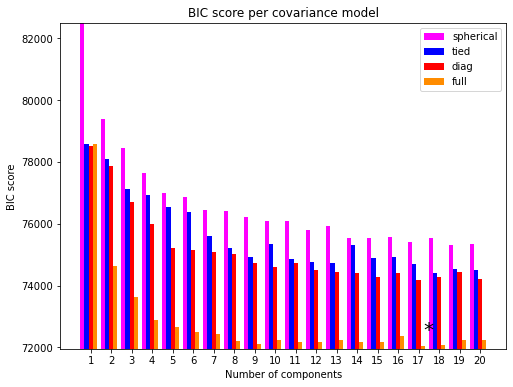

In [227]:

plot_bic(bic_pca_em_fh,clusters,dataset=reduced_PCA)

In [449]:
em_pca=GaussianMixture(n_components=4,covariance_type='full',random_state=1)
em_pca_fh=em_pca.fit_predict(reduced_PCA)

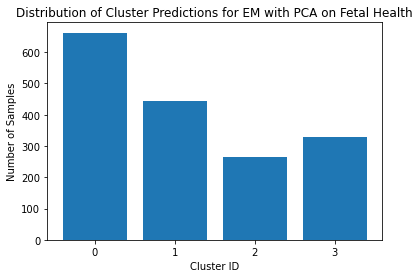

In [452]:
fifa_predications_dist_pca_em=plot_predictions(y_pred=em_pca_fh,k=4,dataset_name='Fetal Health',estimator='EM with PCA')

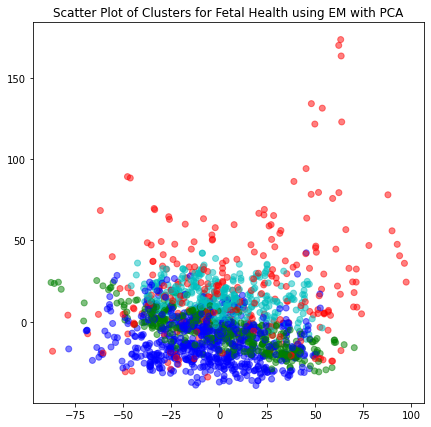

In [451]:
fifa_pca_em_plot=plot_clusters(X_clustered=em_pca_fh,X_data=reduced_PCA,dataset_name='Fetal Health',estimator_name='EM with PCA')

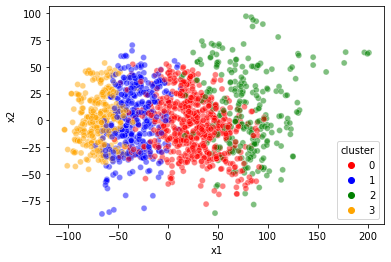

In [453]:
plot2D_PCA(X=x_train,pred_cluster=em_pca_fh)

In [231]:
evaluate_em(n_clusters=3,covariance='full',X=reduced_PCA,y=y_train,dataset_name='Fetal Health',algo_name='EM')

Stats for EM analysis on Fetal Health using EM algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.111 0.071 0.087 0.056 0.085 0.258


orig_label   1.0  2.0  3.0
clust_label               
0            637   63    8
1            462  149   46
2            230   15   90

### ICA

In [209]:
from sklearn.decomposition import FastICA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [202]:
def ica_transform(n_components,X):
    ica=FastICA(n_components,random_state=1,whiten=True)
    reduced_data=ica.fit_transform(X)
    print('Shape of the ICA Data df:'+ str(reduced_data.shape))
    return reduced_data,ica

In [214]:
def ica_component_finder(n_features,x_train,x_test,y_train,y_test,dataset_name):
    n_components=np.linspace(1,n_features*0.8,min(n_features-2,10)).astype('int')
    f1=[]
    for comp in n_components:
        ica=FastICA(n_components=comp,random_state=1,whiten=True)
        reduced_ica=ica.fit_transform(x_train)
        model=MLPClassifier(solver='lbfgs',random_state=1)
        model.fit(reduced_ica,y_train)
        test=ica.transform(x_test)
        f1.append(f1_score(model.predict(test),y_test,average='weighted'))
        
    model2=MLPClassifier(solver='lbfgs',random_state=1)
    model2.fit(x_train,y_train)
    baseline=f1_score(model2.predict(x_test),y_test,average='weighted')

    plt.figure()
    plt.suptitle('F1 Score of ICA on %s' %(dataset_name))
    plt.xlabel('Number of Components')
    plt.ylabel('Model F1 Score')
    plt.plot(n_components,[baseline]*len(f1),color='r')
    plt.plot(n_components,f1)
    return plt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbf

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

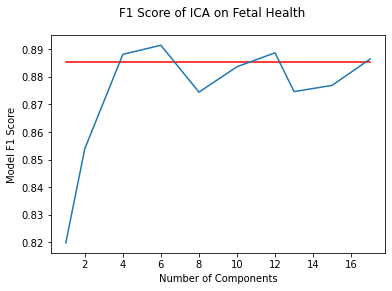

In [215]:
ica_component_finder(n_features=22,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test,dataset_name='Fetal Health')

***n_components=6 has the highest F1 score***

### K_Means with ICA

In [233]:
ica_kmeans_fh=FastICA(n_components=6,random_state=1,whiten=True)
reduced_ica,ica_fh=ica_transform(n_components=6,X=x_train)
#ICA_components_fifa=pd.DataFrame(reduced_ica_fifa)


Shape of the ICA Data df:(1700, 6)


Text(0, 0.5, 'silhouette_score')

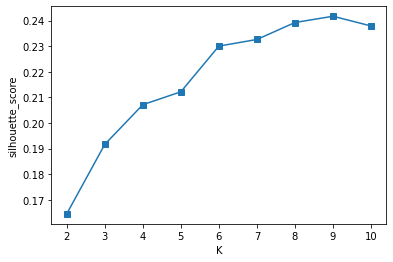

In [234]:
sil_ica=silho(reduced_ica,10)
plt.plot(range(2,11),sil_ica,marker='s')
plt.xlabel('K')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'J (C_K)')

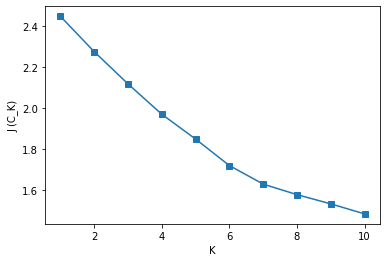

In [454]:
inertia_ica=elbow(reduced_ica,10)
plt.plot(range(1,11),inertia_ica,marker='s')
plt.xlabel('K')
plt.ylabel('J (C_K)')

In [455]:
km_ica_fh=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1)
clusters_ica_km_fh=km_ica_fh.fit_predict(reduced_ica)

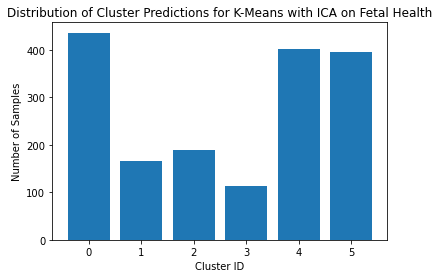

In [456]:
predictions_dist_ica_km=plot_predictions(y_pred=clusters_ica_km_fh,k=6,dataset_name='Fetal Health',estimator='K-Means with ICA')

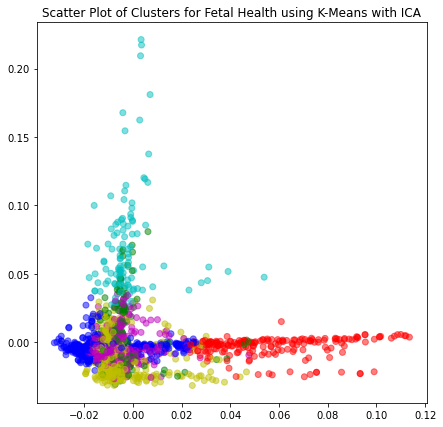

In [457]:
ica_km_fifa_plot=plot_clusters(X_clustered=clusters_ica_km_fh, X_data=reduced_ica,dataset_name='Fetal Health',estimator_name='K-Means with ICA')

In [458]:
def plot2D_ICA(X,pred_cluster):
    ica=FastICA(n_components=2)
    reduced_ica=ica.fit_transform(X)
    reduced_ica=pd.DataFrame(reduced_ica)
    reduced_ica['cluster']=pred_cluster
    reduced_ica.columns=['x1','x2','cluster']
    sns.color_palette("husl", 8)
    sns.scatterplot(data=reduced_ica,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange','brown','purple'],legend='full',alpha=0.5)

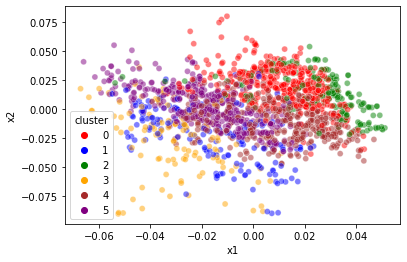

In [459]:
plot2D_ICA(X=x_train,pred_cluster=clusters_ica_km_fh)

In [239]:
evaluate_km(n_clusters=3,X=reduced_ica,y=y_train,dataset_name='Fetal Health',algo_name='K-Means')

Stats for K-Means analysis on Fetal Health using K-Means algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.160 0.108 0.128 0.147 0.127 0.192


orig_label   1.0  2.0  3.0
clust_label               
0            739   26   14
1             90  103   38
2            500   98   92

### EM with ICA

In [240]:
clusters=20
bic_ica_em_fh,best_ica_em_fh=EM_analysis(reduced_ica,clusters)
best_ica_em_fh

GaussianMixture(n_components=12)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

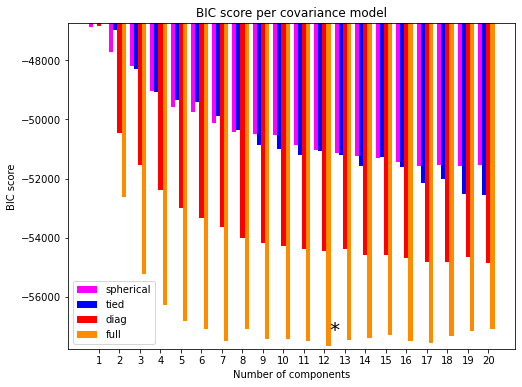

In [241]:
plot_bic(bic_ica_em_fh,clusters,dataset=reduced_ica)

In [464]:
em_ica_fh=GaussianMixture(n_components=6,covariance_type='full',random_state=1)
clusters_ica_em_fh=em_ica_fh.fit_predict(reduced_ica)

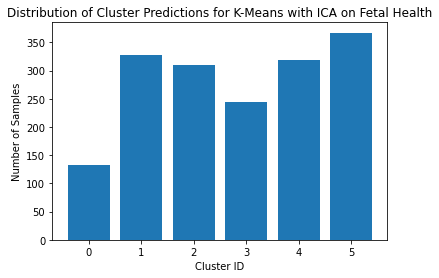

In [465]:
predictions_dist_ica_em=plot_predictions(y_pred=clusters_ica_em_fh,k=6,dataset_name='Fetal Health',estimator='K-Means with ICA')

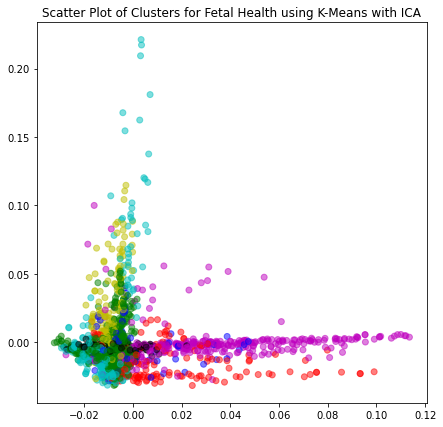

In [462]:
ica_em_fh_plot=plot_clusters(X_clustered=clusters_ica_em_fh, X_data=reduced_ica,dataset_name='Fetal Health',estimator_name='K-Means with ICA')

In [ ]:
def plot2D_ICA(X,pred_cluster):
    ica=FastICA(n_components=2)
    reduced_ica=ica.fit_transform(X)
    reduced_ica=pd.DataFrame(reduced_ica)
    reduced_ica['cluster']=pred_cluster
    reduced_ica.columns=['x1','x2','cluster']
    sns.color_palette("husl", 8)
    sns.scatterplot(data=reduced_ica,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange','brown','purple'],legend='full',alpha=0.5)

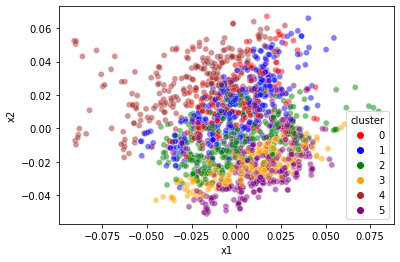

In [466]:
plot2D_ICA(X=x_train,pred_cluster=clusters_ica_em_fh)

In [245]:
evaluate_em(n_clusters=3,covariance='full',X=reduced_ica,y=y_train,dataset_name='Fetal Health',algo_name='EM')

Stats for EM analysis on Fetal Health using EM algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.172 0.107 0.132 0.091 0.131 0.122


orig_label   1.0  2.0  3.0
clust_label               
0            627   12   93
1            219  163   46
2            483   52    5

### Random Projections

In [248]:
from sklearn.random_projection import SparseRandomProjection

In [400]:
def rp_transform(n_components, X):
    rp=SparseRandomProjection(n_components=n_components,random_state=1)
    reduced_rp=rp.fit_transform(X)
    print('Shape of the Sparse Random Projection Data df:'+ str(np.array(reduced_rp).shape))
    return reduced_rp,rp

In [256]:
def rp_component_finder(n_features,x_train,x_test,y_train,y_test,dataset_name):
    n_components=np.linspace(1,n_features*0.8,min(n_features-2,10)).astype('int')
    f1=[]
    for comp in n_components:
        rp=SparseRandomProjection(n_components=comp,random_state=1)
        reduced_rp=rp.fit_transform(x_train)
        
        model=MLPClassifier(solver='lbfgs',random_state=1)
        model.fit(reduced_rp,y_train)
        test=rp.transform(x_test)
        f1.append(f1_score(model.predict(test),y_test,average='weighted'))
        
    model2=MLPClassifier(solver='lbfgs',random_state=1)
    model2.fit(x_train,y_train)
    baseline=f1_score(model2.predict(x_test),y_test,average='weighted')

    plt.figure()
    plt.suptitle('F1 Score of Sparse Random Projection on %s' %(dataset_name))
    plt.xlabel('Number of Components')
    plt.ylabel('Model F1 Score')
    plt.plot(n_components,[baseline]*len(f1),color='r')
    plt.plot(n_components,f1,'-s')
    return plt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocess

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

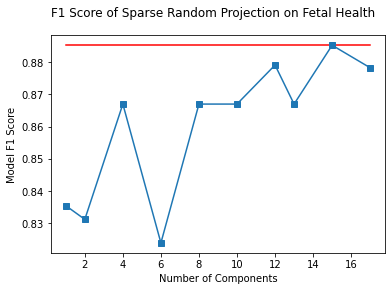

In [257]:
rp_component_finder(n_features=22,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test,dataset_name='Fetal Health')

***n_components=15 has the highest score***

In [259]:
rp_reduced,rp=rp_transform(n_components=15, X=x_train)

Shape of the Sparse Random Projection Data df:(1700, 15)


### K-Means with Random Projection

Text(0, 0.5, 'silhouette_score')

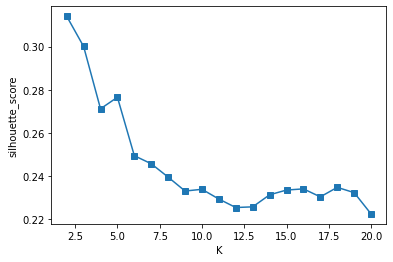

In [260]:
sil_rp=silho(rp_reduced,20)
plt.plot(range(2,21),sil_rp,marker='s')
plt.xlabel('K')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'J (C_K)')

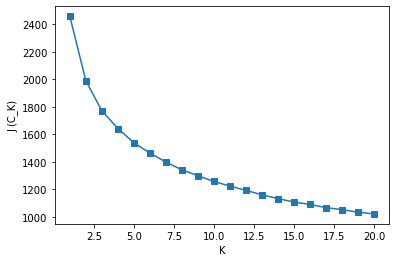

In [261]:
inertia_rp=elbow(rp_reduced,20)
plt.plot(range(1,21),inertia_rp,marker='s')
plt.xlabel('K')
plt.ylabel('J (C_K)')

In [262]:
km_rp_fh=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1)
clusters_rp_km_fh=km_rp_fh.fit_predict(rp_reduced)

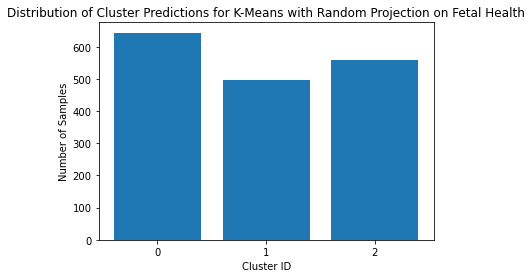

In [263]:
predictions_dist_rp_km=plot_predictions(y_pred=clusters_rp_km_fh,k=3,dataset_name='Fetal Health',estimator='K-Means with Random Projection')

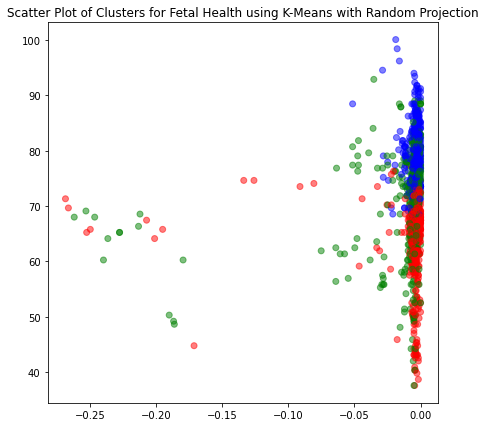

In [265]:
rp_km_fh_plot=plot_clusters(X_clustered=clusters_rp_km_fh, X_data=rp_reduced,dataset_name='Fetal Health',estimator_name='K-Means with Random Projection')

In [488]:
def plot2D_RP(X,pred_cluster):
    rp=SparseRandomProjection(n_components=2)
    reduced_rp=rp.fit_transform(X)
    reduced_rp=pd.DataFrame(reduced_rp)
    reduced_rp['cluster']=pred_cluster
    reduced_rp.columns=['x1','x2','cluster']
    sns.scatterplot(data=reduced_rp,x='x1',y='x2',hue='cluster',palette=['red','blue','green','orange','black','purple','pink','grey','tan'],legend='full',alpha=0.5)

In [511]:
#plot2D_RP(X=rp_reduced,pred_cluster=clusters_rp_km_fh)

In [267]:
evaluate_km(n_clusters=3,X=rp_reduced,y=y_train,dataset_name='Fetal Health',algo_name='K-Means')

Stats for K-Means analysis on Fetal Health using K-Means algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.070 0.043 0.053 0.008 0.052 0.300


orig_label   1.0  2.0  3.0
clust_label               
0            446  162   36
1            420   47   30
2            463   18   78

### EM with Random Projection

In [268]:
clusters=20
bic_rp_em_fh,best_rp_em_fh=EM_analysis(rp_reduced,clusters)
best_rp_em_fh

GaussianMixture(n_components=9)

In [472]:
def silho_em(X,max_k):
    sil=[]
    for k in range(2,max_k+1):
        em=GaussianMixture(n_components=k,random_state=1).fit(X)
        labels=em.predict(X)
        sil.append(silhouette_score(X, labels, metric='euclidean'))
    return sil

Text(0, 0.5, 'silhouette_score')

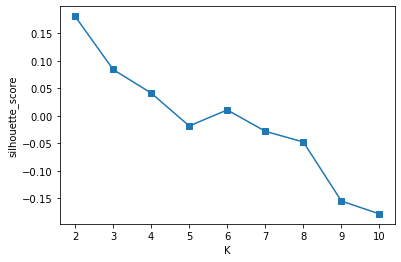

In [473]:
sil_rp=silho_em(rp_reduced,10)
plt.plot(range(2,11),sil_rp,marker='s')
plt.xlabel('K')
plt.ylabel('silhouette_score')

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

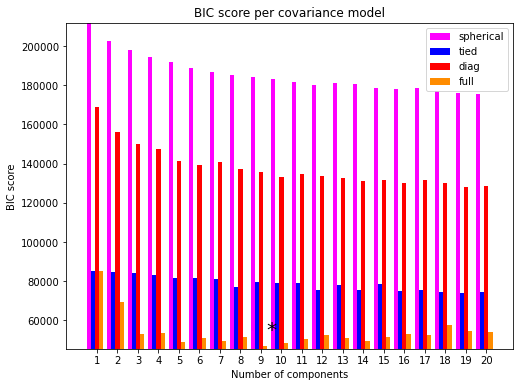

In [271]:

plot_bic(bic_rp_em_fh,clusters,dataset=rp_reduced)

In [483]:
em_rp_fh=GaussianMixture(n_components=9,covariance_type='full',random_state=1)
clusters_rp_em_fh=em_rp_fh.fit_predict(rp_reduced)

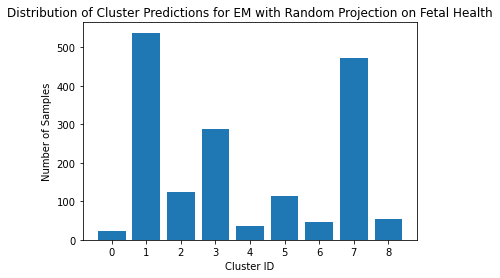

In [484]:
predictions_dist_rp_em=plot_predictions(y_pred=clusters_rp_em_fh,k=9,dataset_name='Fetal Health',estimator='EM with Random Projection')

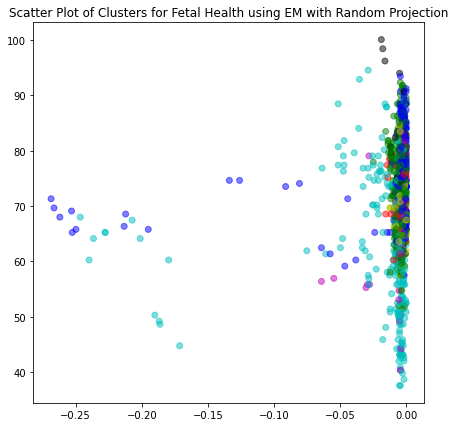

In [476]:
rp_em_fh_plot=plot_clusters(X_clustered=clusters_rp_em_fh, X_data=rp_reduced,dataset_name='Fetal Health',estimator_name='EM with Random Projection')

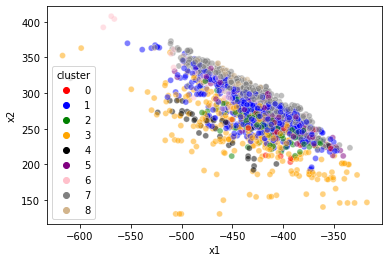

In [489]:
plot2D_RP(X=rp_reduced,pred_cluster=clusters_rp_em_fh)

In [275]:
evaluate_em(n_clusters=3,covariance='full',X=rp_reduced,y=y_train,dataset_name='Fetal Health',algo_name='EM')

Stats for EM analysis on Fetal Health using EM algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.087 0.056 0.068 0.023 0.067 0.084


orig_label   1.0  2.0  3.0
clust_label               
0            585    7   63
1            518  178   51
2            226   42   30

### ISOMAP

In [276]:
from sklearn.manifold import Isomap

In [280]:
def isomap_transform(n_components, X):
    isomap=Isomap(n_components=n_components)
    iso_reduced_data=isomap.fit_transform(X)
    print('Shape of the Isomap Data of:' + str(iso_reduced_data.shape))
    return iso_reduced_data,isomap

In [277]:
def rp_component_finder(n_features,x_train,x_test,y_train,y_test,dataset_name):
    n_components=np.linspace(3,max((n_features/2),8)*0.8,min(n_features-2,10)).astype('int')
    n_neighbors=np.linspace(2,len(x_train)**(1/2),9).astype('int')
    last_neighbor=n_neighbors[len(n_neighbors)-1]
    f1={}
    for comp in n_components:
        acc=[]
        for neighbors in n_neighbors:
            isomap=Isomap(n_components=comp,n_neighbors=neighbors)
            reduced_isomap=isomap.fit_transform(x_train)

            model=MLPClassifier(solver='lbfgs',random_state=1)
            model.fit(reduced_isomap,y_train)
            test=isomap.transform(x_test)
            acc.append(f1_score(model.predict(test),y_test,average='weighted'))
            if neighbors==last_neighbor:
                f1[comp]=acc

    model2=MLPClassifier(solver='lbfgs',random_state=1)
    model2.fit(x_train,y_train)
    baseline=f1_score(model2.predict(x_test),y_test,average='weighted')

    plt.figure()
    plt.suptitle('F1 Score of Isomap on %s' %(dataset_name))
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Model F1 Score')
    plt.plot(n_neighbors,[baseline]*len(n_neighbors),color='r')
    for comp,f1_values in f1.items():
        plt.plot(n_neighbors,f1_values,'-o',label='n_components'+': '+str(comp))
    plt.legend()
    
    return plt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

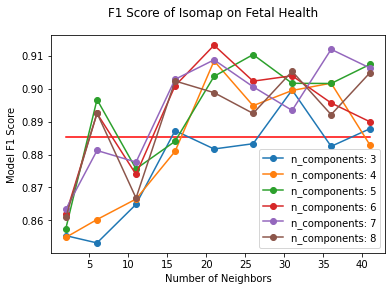

In [278]:
rp_component_finder(n_features=22,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test,dataset_name='Fetal Health')

In [281]:
iso_reduced,isomap=isomap_transform(n_components=6,X=x_train)

Shape of the Isomap Data of:(1700, 6)


### K-Means with Isomap

Text(0, 0.5, 'silhouette_score')

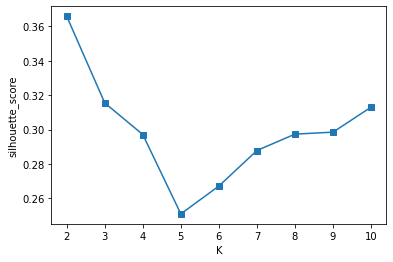

In [490]:
sil_iso=silho(iso_reduced,10)
plt.plot(range(2,11),sil_iso,marker='s')
plt.xlabel('K')
plt.ylabel('silhouette_score')

Text(0, 0.5, 'J (C_K)')

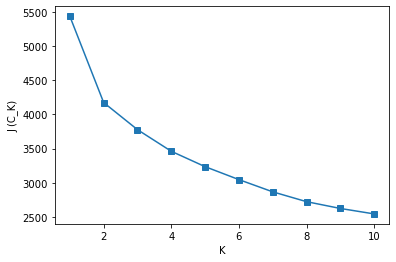

In [491]:
inertia_iso=elbow(iso_reduced,10)
plt.plot(range(1,11),inertia_iso,marker='s')
plt.xlabel('K')
plt.ylabel('J (C_K)')

In [492]:
km_iso_fh=KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=1)
clusters_iso_km_fh=km_iso_fh.fit_predict(iso_reduced)

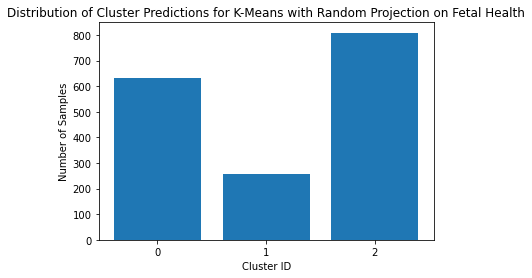

In [285]:
predictions_dist_iso_km=plot_predictions(y_pred=clusters_iso_km_fh,k=3,dataset_name='Fetal Health',estimator='K-Means with Random Projection')

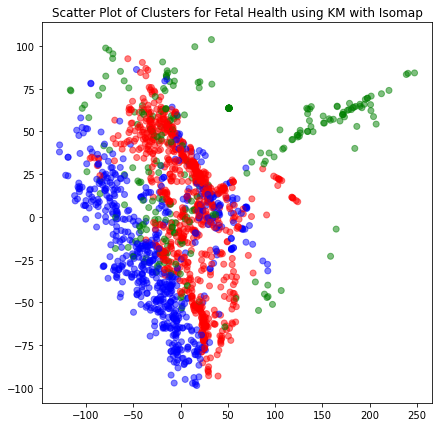

In [302]:
iso_km_fifa_plot=plot_clusters(X_clustered=clusters_iso_km_fh, X_data=iso_reduced,dataset_name='Fetal Health',estimator_name='KM with Isomap')

In [509]:
def plot2D_ISO(X,pred_cluster):
    isomap=Isomap(n_components=2)
    reduced_iso=isomap.fit_transform(X)
    reduced_iso=pd.DataFrame(reduced_iso)
    reduced_iso['cluster']=pred_cluster
    reduced_iso.columns=['x1','x2','cluster']
    sns.scatterplot(data=reduced_iso,x='x1',y='x2',hue='cluster',palette=['red','blue','green','brown'],legend='full',alpha=0.5)

In [512]:
#plot2D_ISO(X=x_train,pred_cluster=clusters_iso_km_fh)

In [288]:
evaluate_km(n_clusters=3,X=iso_reduced,y=y_train,dataset_name='Fetal Health',algo_name='K-Means')

Stats for K-Means analysis on Fetal Health using K-Means algorithm
inertia homo compl v-meas ARI AMI silhouette
3606856 0.108 0.072 0.086 0.047 0.085 0.316


orig_label   1.0  2.0  3.0
clust_label               
0            580   39   13
1            160   17   82
2            589  171   49

### EM with Isomap

In [496]:
clusters=40
bic_iso_em_fh,best_iso_em_fh=EM_analysis(iso_reduced,clusters)
best_iso_em_fh

GaussianMixture(n_components=30)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

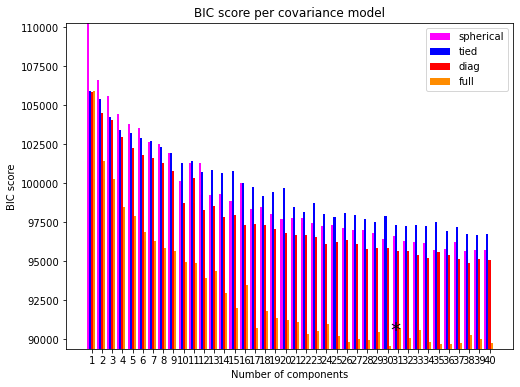

In [497]:
plot_bic(bic_iso_em_fh,clusters,dataset=iso_reduced)

Text(0, 0.5, 'silhouette_score')

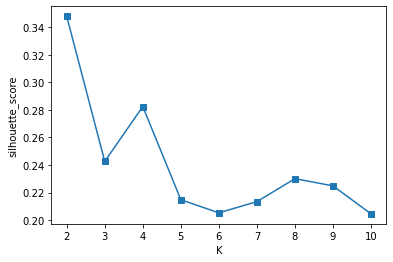

In [498]:
sil_rp=silho_em(iso_reduced,10)
plt.plot(range(2,11),sil_rp,marker='s')
plt.xlabel('K')
plt.ylabel('silhouette_score')

In [499]:
em_iso_fh=GaussianMixture(n_components=4,covariance_type='full',random_state=1)
clusters_iso_em_fh=em_iso_fh.fit_predict(iso_reduced)

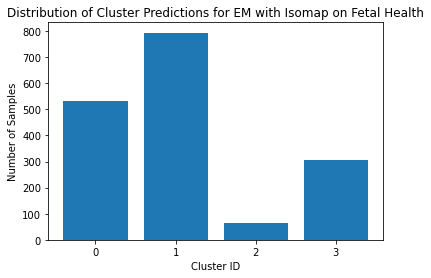

In [500]:
predictions_dist_iso_em=plot_predictions(y_pred=clusters_iso_em_fh,k=4,dataset_name='Fetal Health',estimator='EM with Isomap')

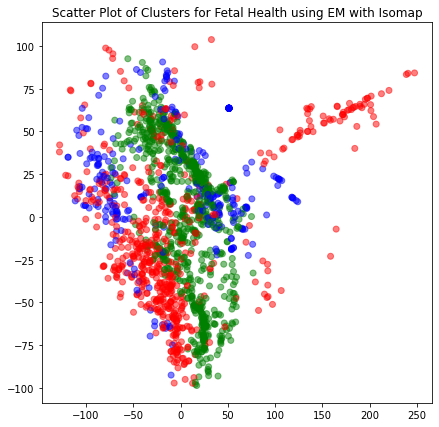

In [301]:
iso_em_fh_plot=plot_clusters(X_clustered=clusters_iso_em_fh, X_data=iso_reduced,dataset_name='Fetal Health',estimator_name='EM with Isomap')

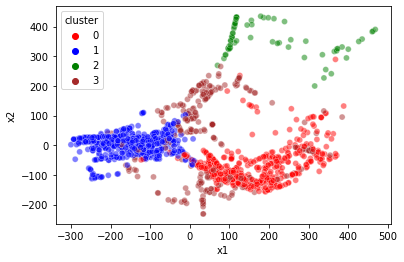

In [510]:
plot2D_ISO(X=iso_reduced,pred_cluster=clusters_iso_em_fh)


In [502]:
evaluate_em(n_clusters=3,covariance='full',X=iso_reduced,y=y_train,dataset_name='Fetal Health',algo_name='EM')

Stats for EM analysis on Fetal Health using EM algorithm
inertia homo compl v-meas ARI AMI silhouette
3041573 0.058 0.038 0.046 0.005 0.044 0.243


orig_label   1.0  2.0  3.0
clust_label               
0            228   47   20
1            595  163   43
2            506   17   81

In [372]:
# Feature importance

from sklearn.ensemble import RandomForestClassifier

In [373]:
def find_important_features(X_train, y_train, dataset_features, dataset_name, n_features):
    plt.figure()
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(X=X_train, y=y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-(n_features-1):]  
    plt.title('Feature Importances for %s' %(dataset_name))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [dataset_features[i] for i in indices], rotation=45)
    plt.xlabel('Relative Importance')
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

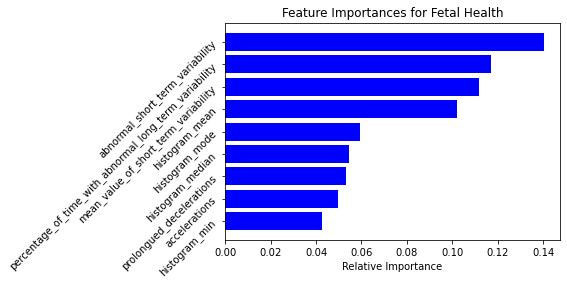

In [377]:
find_important_features(X_train=x_train, y_train=y_train, dataset_features=features, dataset_name='Fetal Health', n_features=10)

In [378]:
def plot_confusion_matrix(y_true, y_pred, target_names, learner, dataset, cmap=plt.cm.RdPu, normalize=True):
  
    cm = confusion_matrix(y_true, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(learner + " Confusion Matrix for: " + dataset)
    plt.colorbar()
    plt.tick_params(labelsize=14)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = 0.55
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            if i == min(range(cm.shape[0])):
                plt.text(j, i + 0.25, "{0:0.1%}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="black" if cm[i, j] <= thresh else "white", fontsize=14)
            elif i == max(range(cm.shape[0])):
                plt.text(j, i - 0.25, "{0:0.1%}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="black" if cm[i, j] <= thresh else "white", fontsize=14)
            else:
                plt.text(j, i, "{0:0.1%}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="black" if cm[i, j] <= thresh else "white", fontsize=14)

        else:
            plt.text(j, i + 0.25, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] <= thresh else "white", fontsize=14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass), fontsize=14)
    return plt

In [385]:
import timeit
def evaluate_classifier(classifier, learner, dataset, X_train, X_test, y_train, y_test, class_names, feature_names):
    #warnings.filterwarnings('ignore', 'F-score is ill-defined.*')
    # Training time
    start_time = timeit.default_timer()
    classifier.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = (end_time - start_time) * 1000  # milliseconds

    # Prediction Time
    start_time = timeit.default_timer()
    y_pred = classifier.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = (end_time - start_time) * 1000  # milliseconds

    # Distribution of Predictions
    distribution_plot = plt.figure()
    unique, counts = np.unique(y_pred, return_counts=True)
    res_classes = dict(zip(unique, counts))
    plt.bar(*zip(*res_classes.items()))
    plt.xticks((1, 2, 3), labels=class_names)
    plt.title("Distribution of Predictions, over all Classes")

    # Standard Metrics
    f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))  # Use average = 'micro', 'macro' or 'weighted' since we have non-binary classes. Don't count classes that are never predicted.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    confusion_matrix_plot = plot_confusion_matrix(y_test, y_pred, learner=learner, dataset=dataset, target_names=class_names)

    print("Metrics for the %s on the %s Dataset" %(learner, dataset))
    print("Model Training Time (ms):   " + "{:.1f}".format(training_time))
    print("Model Prediction Time (ms): " + "{:.1f}\n".format(pred_time))
    print("F1 Score:  " + "{:.2f}".format(f1))
    print("Check the confusion plot!")
    print("Accuracy:  " + "{:.2f}".format(accuracy))
    print("Precision: " + "{:.2f}".format(precision))
    print("Recall:    " + "{:.2f}".format(recall))
    return "{0:.2f}".format(f1), "{0:.2f}".format(accuracy), "{0:.2f}".format(precision), "{0:.2f}".format(recall), "{:.1f}".format(training_time), "{:.1f}".format(pred_time), distribution_plot, confusion_matrix_plot


In [380]:
def ohe_ndarray(ndarray, n_clusters):
    num_values = n_clusters
    ohe = np.eye(num_values)[ndarray.reshape(-1)]
    return ohe

In [381]:
nn_activation = 'relu'
nn_hls = [150,]
nn_estimator = MLPClassifier(activation=nn_activation, max_iter=400, solver='lbfgs', hidden_layer_sizes=nn_hls, random_state=1)

In [382]:
labels=["Normal", "Suspect", "Pathological"]

Metrics for the Supervised Learning Neural Network on the Fetal Health Dataset
Model Training Time (ms):   1609.1
Model Prediction Time (ms): 1.4

F1 Score:  0.89
Check the confusion plot!
Accuracy:  0.89
Precision: 0.89
Recall:    0.89


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



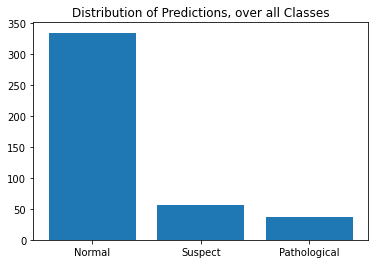

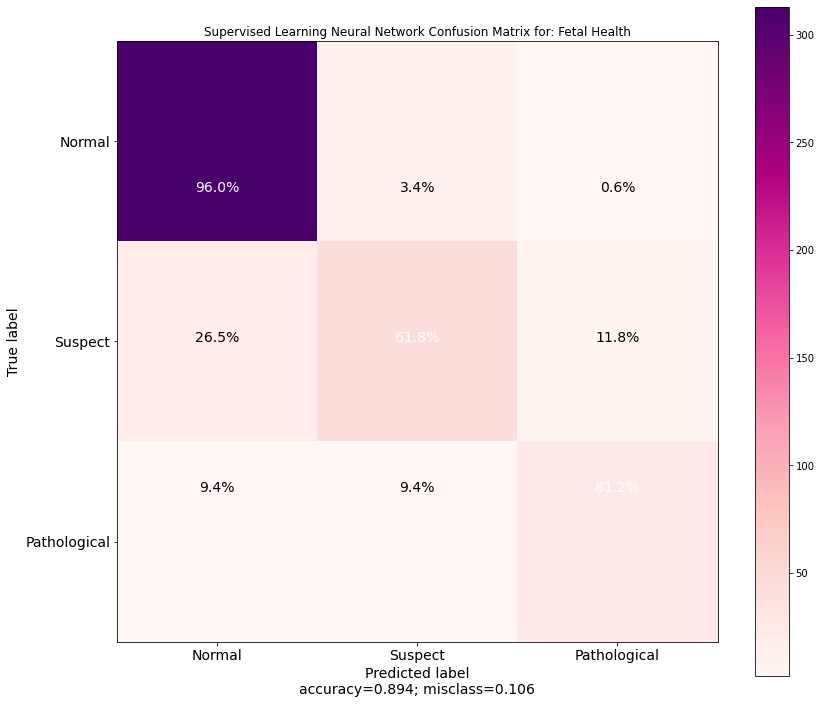

In [419]:
# Baseline NN (supervised learning)

nn_test_f1, nn_test_acc, nn_test_precision, nn_test_recall, nn_train_time, nn_test_time, nn_distribution_plot_baseline, confusion_matrix_plot_baseline = evaluate_classifier(classifier=nn_estimator, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, learner='Supervised Learning Neural Network', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results = ['nn_results', nn_test_f1, nn_test_acc, nn_test_precision, nn_test_recall, nn_train_time, nn_test_time]



Shape of the PCA Data df: (1700, 5)
Metrics for the Neural Network with PCA on the Fetal Health Dataset
Model Training Time (ms):   1416.9
Model Prediction Time (ms): 0.6

F1 Score:  0.91
Check the confusion plot!
Accuracy:  0.91
Precision: 0.91
Recall:    0.91


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



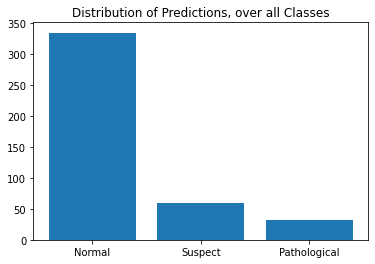

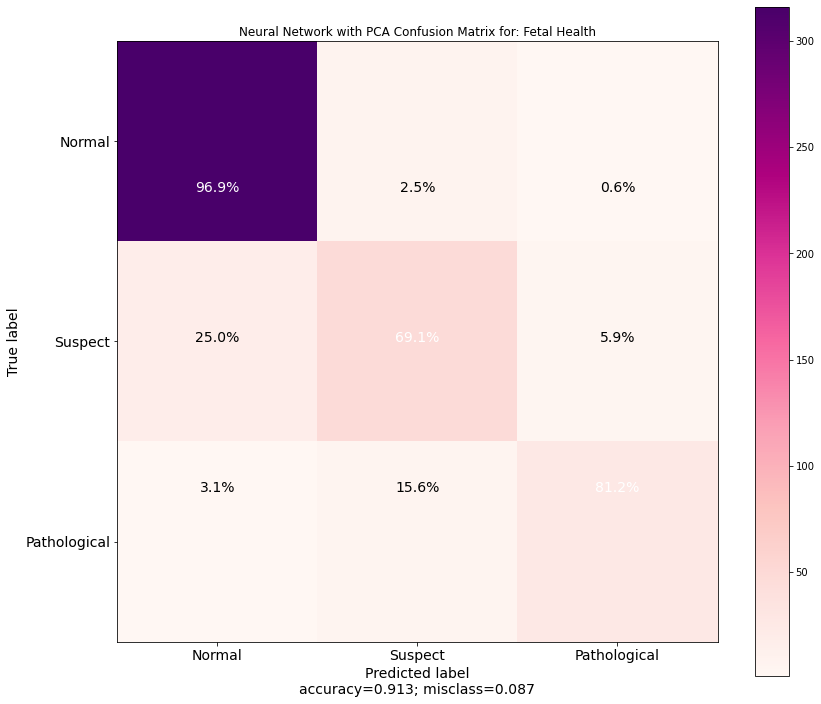

In [396]:
# ... with PCA DR but without clustering: x-validation and final classifier evaluation
x_train_reduced_pca, pca_nn = pca_transform(n_comp=5, X_train=x_train)
x_test_pca_transformed = pca_nn.transform(x_test)
nn_test_f1_pca, nn_test_acc_pca, nn_test_precision_pca, nn_test_recall_pca, nn_train_time_pca, nn_test_time_pca, nn_distribution_plot_pca, confusion_matrix_plot_pca = evaluate_classifier(classifier=nn_estimator, X_train= x_train_reduced_pca, X_test=x_test_pca_transformed, y_train=y_train, y_test=y_test, learner='Neural Network with PCA', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_pca = ['nn_results_pca', nn_test_f1_pca, nn_test_acc_pca, nn_test_precision_pca, nn_test_recall_pca, nn_train_time_pca, nn_test_time_pca]


Shape of the ICA Data df: (1700, 6)
Metrics for the Neural Network with ICA on the Fetal Health Dataset
Model Training Time (ms):   1307.1
Model Prediction Time (ms): 0.6

F1 Score:  0.89
Check the confusion plot!
Accuracy:  0.89
Precision: 0.89
Recall:    0.89


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



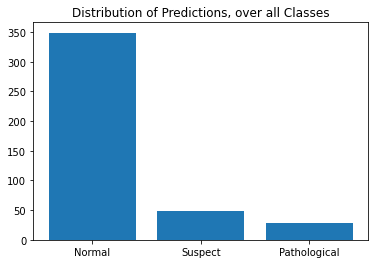

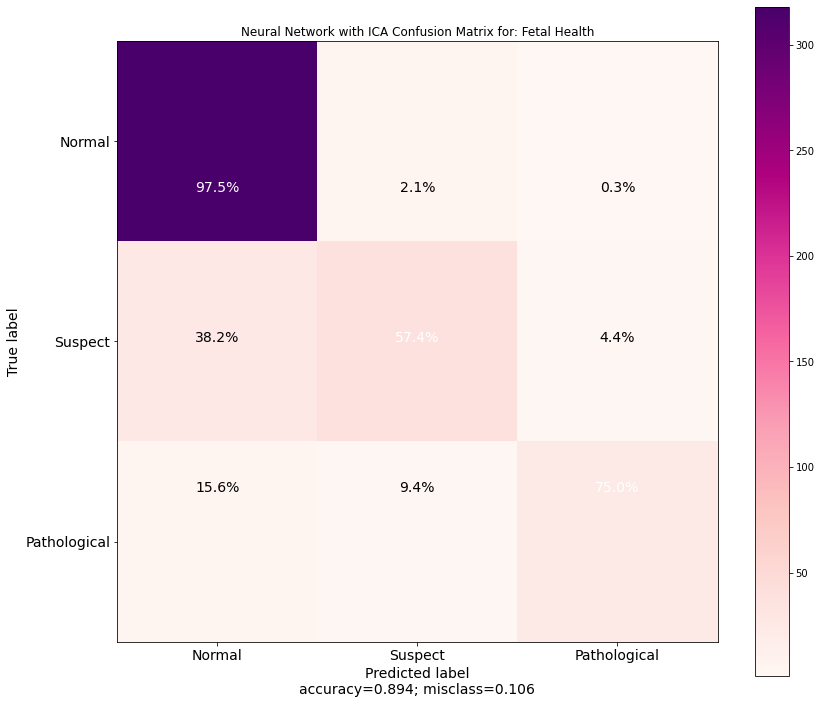

In [399]:
# ... with ICA DR but without clustering: x-validation and final classifier evaluation
x_train_reduced_ica, ica_nn = ica_transform(n_components=6, X_train=x_train)
x_test_ica_transformed = ica_nn.transform(x_test)
nn_test_f1_ica, nn_test_acc_ica, nn_test_precision_ica, nn_test_recall_ica, nn_train_time_ica, nn_test_time_ica, nn_distribution_plot_ica, confusion_matrix_plot_ica = evaluate_classifier(classifier=nn_estimator, X_train= x_train_reduced_ica, X_test=x_test_ica_transformed, y_train=y_train, y_test=y_test, learner='Neural Network with ICA', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_ica = ['nn_results_ica', nn_test_f1_ica, nn_test_acc_ica, nn_test_precision_ica, nn_test_recall_ica, nn_train_time_ica, nn_test_time_ica]


Shape of the Sparse Random Projection Data df:(1700, 15)
Metrics for the Neural Network with Sparse RP on the Fetal Health Dataset
Model Training Time (ms):   148.6
Model Prediction Time (ms): 1.1

F1 Score:  0.87
Check the confusion plot!
Accuracy:  0.77
Precision: 0.77
Recall:    1.00


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



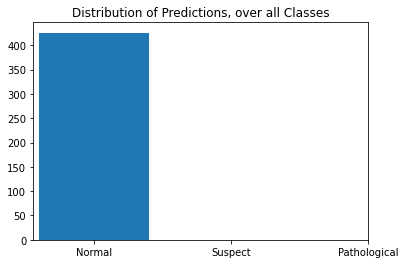

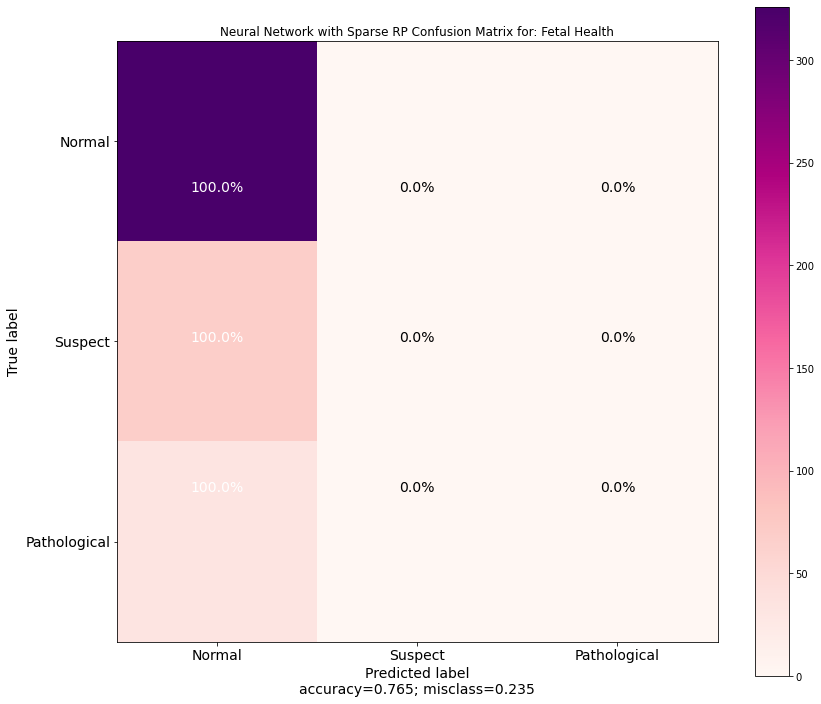

In [402]:
# ... with RP DR but without clustering: x-validation and final classifier evaluation
x_train_reduced_rp, rp_nn = rp_transform(n_components=15, X=x_train)
x_test_rp_transformed = rp_nn.transform(x_test)
nn_test_f1_rp, nn_test_acc_rp, nn_test_precision_rp, nn_test_recall_rp, nn_train_time_rp, nn_test_time_rp, nn_distribution_plot_rp, confusion_matrix_plot_rp = evaluate_classifier(classifier=nn_estimator, X_train= x_train_reduced_rp, X_test=x_test_rp_transformed, y_train=y_train, y_test=y_test, learner='Neural Network with Sparse RP', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_rp = ['nn_results_rp', nn_test_f1_rp, nn_test_acc_rp, nn_test_precision_rp, nn_test_recall_rp, nn_train_time_rp, nn_test_time_rp]


Shape of the Isomap Data of:(1700, 6)
Metrics for the Neural Network with ISOMAP on the Fetal Health Dataset
Model Training Time (ms):   1372.2
Model Prediction Time (ms): 0.7

F1 Score:  0.89
Check the confusion plot!
Accuracy:  0.89
Precision: 0.89
Recall:    0.89


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



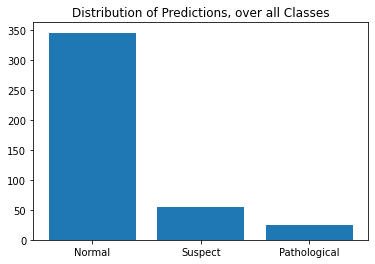

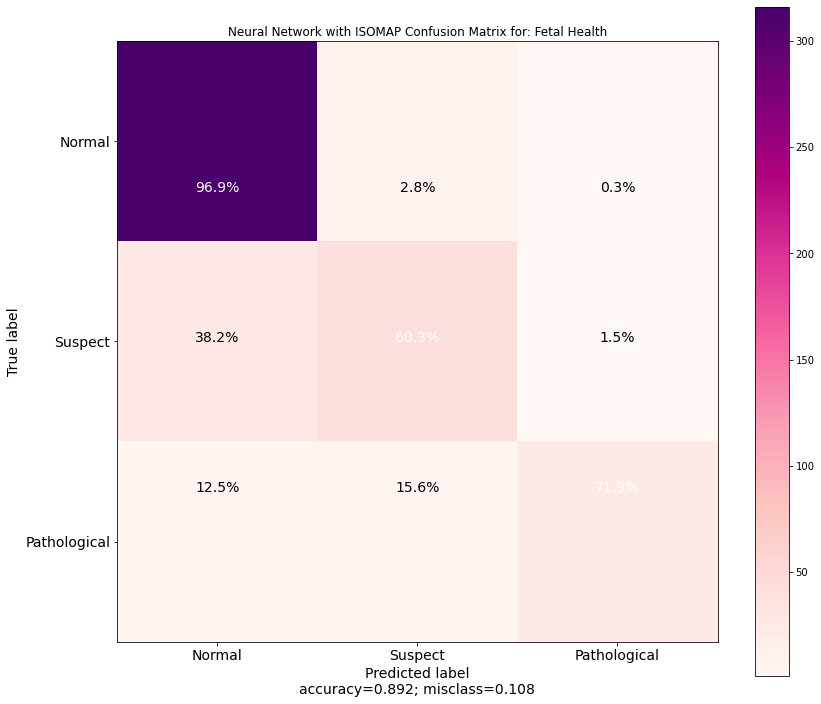

In [406]:
# ... with ISOMAP DR but without clustering: x-validation and final classifier evaluation
x_train_reduced_isomap, isomap_nn = isomap_transform(n_components=6, X=x_train)
x_test_isomap_transformed = isomap_nn.transform(x_test)
nn_test_f1_isomap, nn_test_acc_isomap, nn_test_precision_isomap, nn_test_recall_isomap, nn_train_time_isomap, nn_test_time_isomap, nn_distribution_plot_isomap, confusion_matrix_plot_isomap = evaluate_classifier(classifier=nn_estimator, X_train= x_train_reduced_isomap, X_test=x_test_isomap_transformed, y_train=y_train, y_test=y_test, learner='Neural Network with ISOMAP', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_isomap = ['nn_results_isomap', nn_test_f1_isomap, nn_test_acc_isomap, nn_test_precision_isomap, nn_test_recall_isomap, nn_train_time_isomap, nn_test_time_isomap]



In [408]:
# ... with only EM clustering: x-validation and final classifier evaluation
train_em_clusters = em.fit_predict(x_train)
test_em_clusters = em.predict(x_test)

Metrics for the Neural Network with EM Clustering on the Fetal Health Dataset
Model Training Time (ms):   1583.0
Model Prediction Time (ms): 2.2

F1 Score:  0.89
Check the confusion plot!
Accuracy:  0.89
Precision: 0.89
Recall:    0.89


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



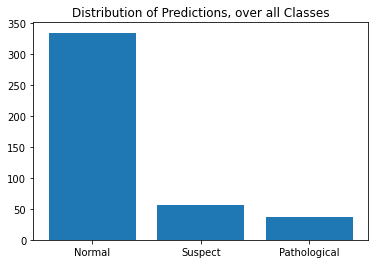

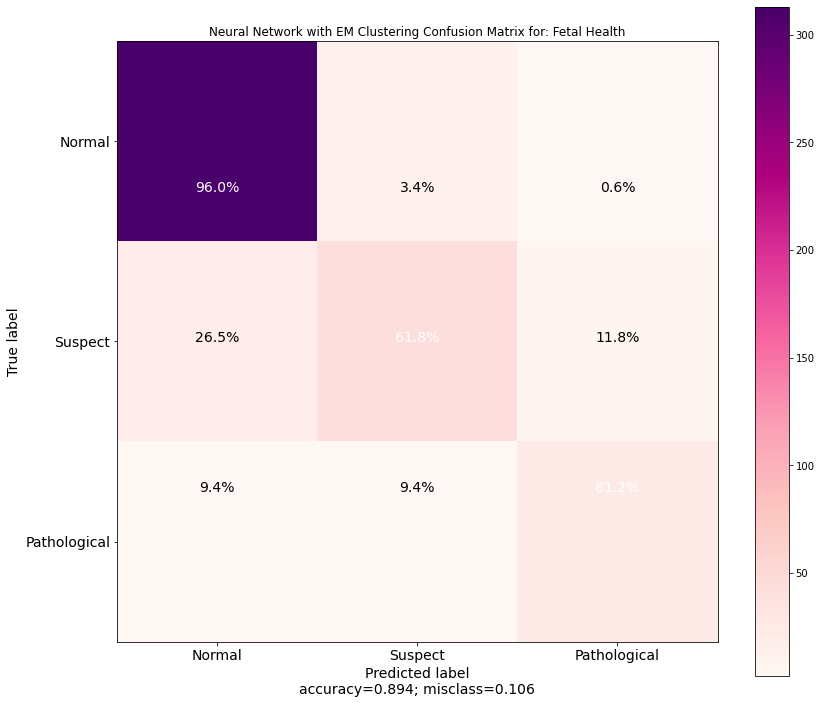

In [410]:
nn_test_f1_em, nn_test_acc_em, nn_test_precision_em, nn_test_recall_em, nn_train_time_em, nn_test_time_em, nn_distribution_plot_em, confusion_matrix_plot_em = evaluate_classifier(classifier=nn_estimator, X_train= x_train, X_test=x_test, y_train=y_train, y_test=y_test, learner='Neural Network with EM Clustering', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_em = ['nn_results_em', nn_test_f1_em, nn_test_acc_em, nn_test_precision_em, nn_test_recall_em, nn_train_time_em, nn_test_time_em]



In [412]:
# ... with only KMeans clustering: x-validation and final classifier evaluation
train_kmeans_clusters = km.fit_predict(x_train)
test_kmeans_clusters = km.predict(x_test)

Metrics for the Neural Network with K-Means on the Fetal Health Dataset
Model Training Time (ms):   1609.5
Model Prediction Time (ms): 1.5

F1 Score:  0.89
Check the confusion plot!
Accuracy:  0.89
Precision: 0.89
Recall:    0.89


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



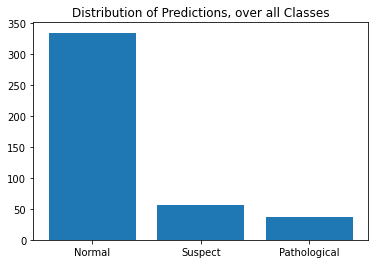

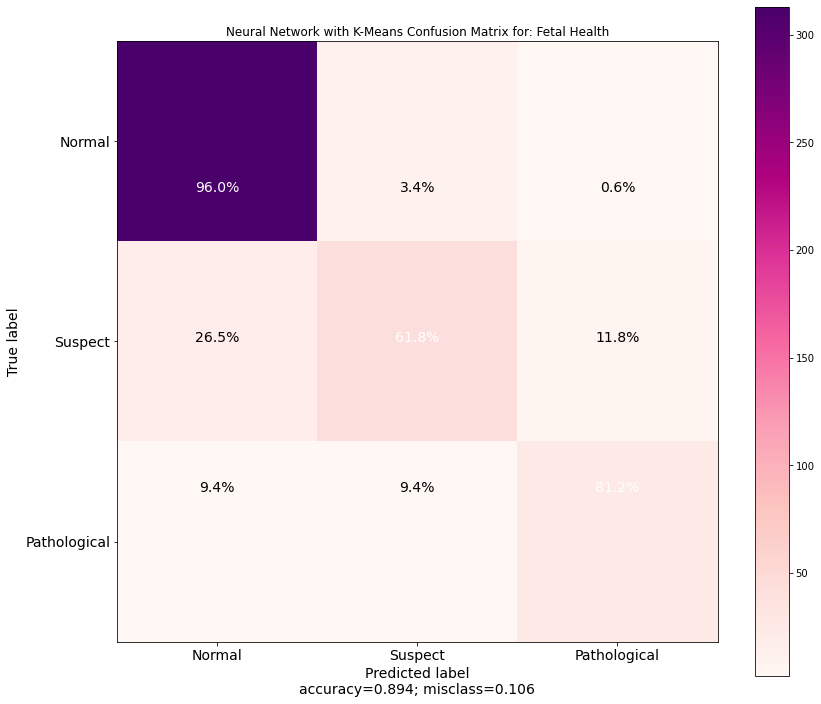

In [413]:
nn_test_f1_kmeans, nn_test_acc_kmeans, nn_test_precision_kmeans, nn_test_recall_kmeans, nn_train_time_kmeans, nn_test_time_kmeans, nn_distribution_plot_kmeans, confusion_matrix_plot_kmeans = evaluate_classifier(classifier=nn_estimator, X_train= x_train, X_test=x_test, y_train=y_train, y_test=y_test, learner='Neural Network with K-Means', dataset="Fetal Health", class_names=labels, feature_names=features)
nn_results_kmeans = ['nn_results_kmeans', nn_test_f1_kmeans, nn_test_acc_kmeans, nn_test_precision_kmeans, nn_test_recall_kmeans, nn_train_time_kmeans, nn_test_time_kmeans]


In [420]:

from tabulate import tabulate
print(tabulate([nn_results, nn_results_pca, nn_results_ica, nn_results_rp, nn_results_isomap, nn_results_em, nn_results_kmeans], headers=['Learner', 'F1_Weighted', 'Accuracy', 'Precision', 'Recall', 'Training time (ms)', 'Prediction time (ms)']))

plt.show()

Learner              F1_Weighted    Accuracy    Precision    Recall    Training time (ms)    Prediction time (ms)
-----------------  -------------  ----------  -----------  --------  --------------------  ----------------------
nn_results                  0.89        0.89         0.89      0.89                1609.1                     1.4
nn_results_pca              0.91        0.91         0.91      0.91                1416.9                     0.6
nn_results_ica              0.89        0.89         0.89      0.89                1307.1                     0.6
nn_results_rp               0.87        0.77         0.77      1                    148.6                     1.1
nn_results_isomap           0.89        0.89         0.89      0.89                1372.2                     0.7
nn_results_em               0.89        0.89         0.89      0.89                1583                       2.2
nn_results_kmeans           0.89        0.89         0.89      0.89                1609.

<BarContainer object of 3 artists>

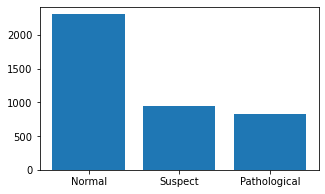

In [516]:
# true label
total=2773
normal=total-471
suspect=total-1831
pathological=total-1950
data=[normal,suspect,pathological]
labels=["Normal", "Suspect", "Pathological"]
plt.figure(figsize=(5,3))
plt.bar(labels,data)